In [1]:
import tensorflow.keras as keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print(x_train_full.shape)

(60000, 28, 28)


分出一部分作为验证数据集

In [5]:
x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankleboot"]

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(loss='sparse_categorical_crossentropy',  # 等价于 keras.losses.sparse_categorical_crossentropy
              optimizer='sgd',  # 等价于 keras.optimizers.SGD()
              metrics=['accuracy']  # keras.metrics.sparse_categorical_accuracy
              )

In [10]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 1.0020 - accuracy: 0.6757 - val_loss: 0.5339 - val_accuracy: 0.8148
Epoch 2/30
1719/1719 [==============================] - 2s 990us/step - loss: 0.4999 - accuracy: 0.8297 - val_loss: 0.4364 - val_accuracy: 0.8546
Epoch 3/30
1719/1719 [==============================] - 2s 987us/step - loss: 0.4464 - accuracy: 0.8454 - val_loss: 0.4313 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4225 - accuracy: 0.8513 - val_loss: 0.3937 - val_accuracy: 0.8618
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4032 - accuracy: 0.8584 - val_loss: 0.4101 - val_accuracy: 0.8558
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3743 - accuracy: 0.8668 - val_loss: 0.3661 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 2s 979us/step - loss: 0.3667 - accuracy: 0.8704 - val_loss: 0.3949 - val_acc

也可以是使用 `validation_split` 参数设置用于验证的数据集比例，例如设置 `validation_split=0.1` 表示将最后 10% 的数据用于验证。

## History

`fit()` 方法返回一个 `History` 对象，包含训练参数 `history.params`，迭代的 epoch `history.epoch`，还包含每个 epoch 训练集上和验证集上的效果信息 `history.history`

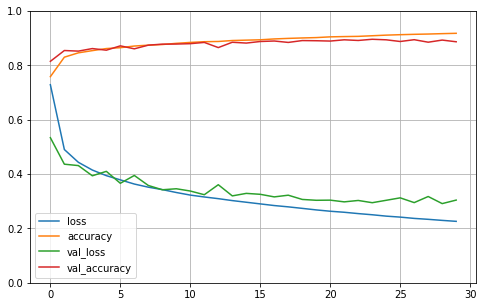

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 设置垂直范围
plt.show()

可以看到，训练 accuracy 和验证 accuracy 在训练构成中都在稳步提高，而训练 loss 和验证 loss 降低。并且训滥曲线和验证曲线比较接近，表示过拟合不严重。

不过看图中，在训练开始时模型在验证集上比在训练集上表现好，其实并非如此。验证错误是在每个 epoch 结束后计算的，而训练错误是每个 epoch 的平均值。所以训练曲线应该向左移动半个 epoch。此时训练曲线和验证曲线就几乎完美重合了。

最终在训练集上性能比验证集上好，在训练较长时间通常会出现该情况。可以看到这个模型还没完全收敛，因为验证集的 loss 依然在降低，所以应该继续训练。

如果对模型的性能不满意，可以调整超参数。
- 首选检查学习率；
- 如果无效，尝试其他的 optimizer (修改其他超参数后，都需要重新调整学习率)
- 如果性能依然不行，可以调整模型的层数，每层的神经元数，激活函数类型
- 也可以调整 batch size

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 920us/step - loss: 61.4654 - accuracy: 0.8453


[61.46541213989258, 0.845300018787384]